# Chapter 1: Language Processing and Python

It is easy to get our hands on millions of words of text. What can we do with it, assuming we can write some simple programs? In this chapter we'll address the following questions:

1. What can we achieve by combining simple programming techniques with large quantities of text?
2. How can we automatically extract key words and phrases that sum up the style and content of a text?
3. What tools and techniques does the Python programming language provide for such work?
4. What are some of the interesting challenges of natural language processing?

This chapter is divided into sections that skip between two quite different styles. In the "computing with language" sections we will take on some linguistically motivated programming tasks without necessarily explaining how they work. In the "closer look at Python" sections we will systematically review key programming concepts. We'll flag the two styles in the section titles, but later chapters will mix both styles without being so up-front about it. We hope this style of introduction gives you an authentic taste of what will come later, while covering a range of elementary concepts in linguistics and computer science. If you have basic familiarity with both areas, you can skip to 5; we will repeat any important points in later chapters, and if you miss anything you can easily consult the online reference material at http://nltk.org/. If the material is completely new to you, this chapter will raise more questions than it answers, questions that are addressed in the rest of this book.

## 1 Computing with Language: Texts and Words

We're all very familiar with text, since we read and write it every day. Here we will treat text as raw data for the programs we write, programs that manipulate and analyze it in a variety of interesting ways. But before we can do this, we have to get started with the Python interpreter.

**NOTE**: Because we are working in Jupyter notebooks and not in the **interpreter** (which is defined below), your interface will look a little bit different from some of the embedded images. 

### 1.1   Getting Started with Python
One of the friendly things about Python is that it allows you to type directly into the interactive **interpreter** — the program that will be running your Python programs. You can access the Python interpreter using a simple graphical interface called the Interactive DeveLopment Environment (IDLE). 

On a Mac you can find this under Applications→MacPython, and on Windows under All Programs→Python. Under Unix you can run Python from the shell by typing idle (if this is not installed, try typing python). The interpreter will print a blurb about your Python version; simply check that you are running Python 3.2 or later (here it is for 3.4.2):


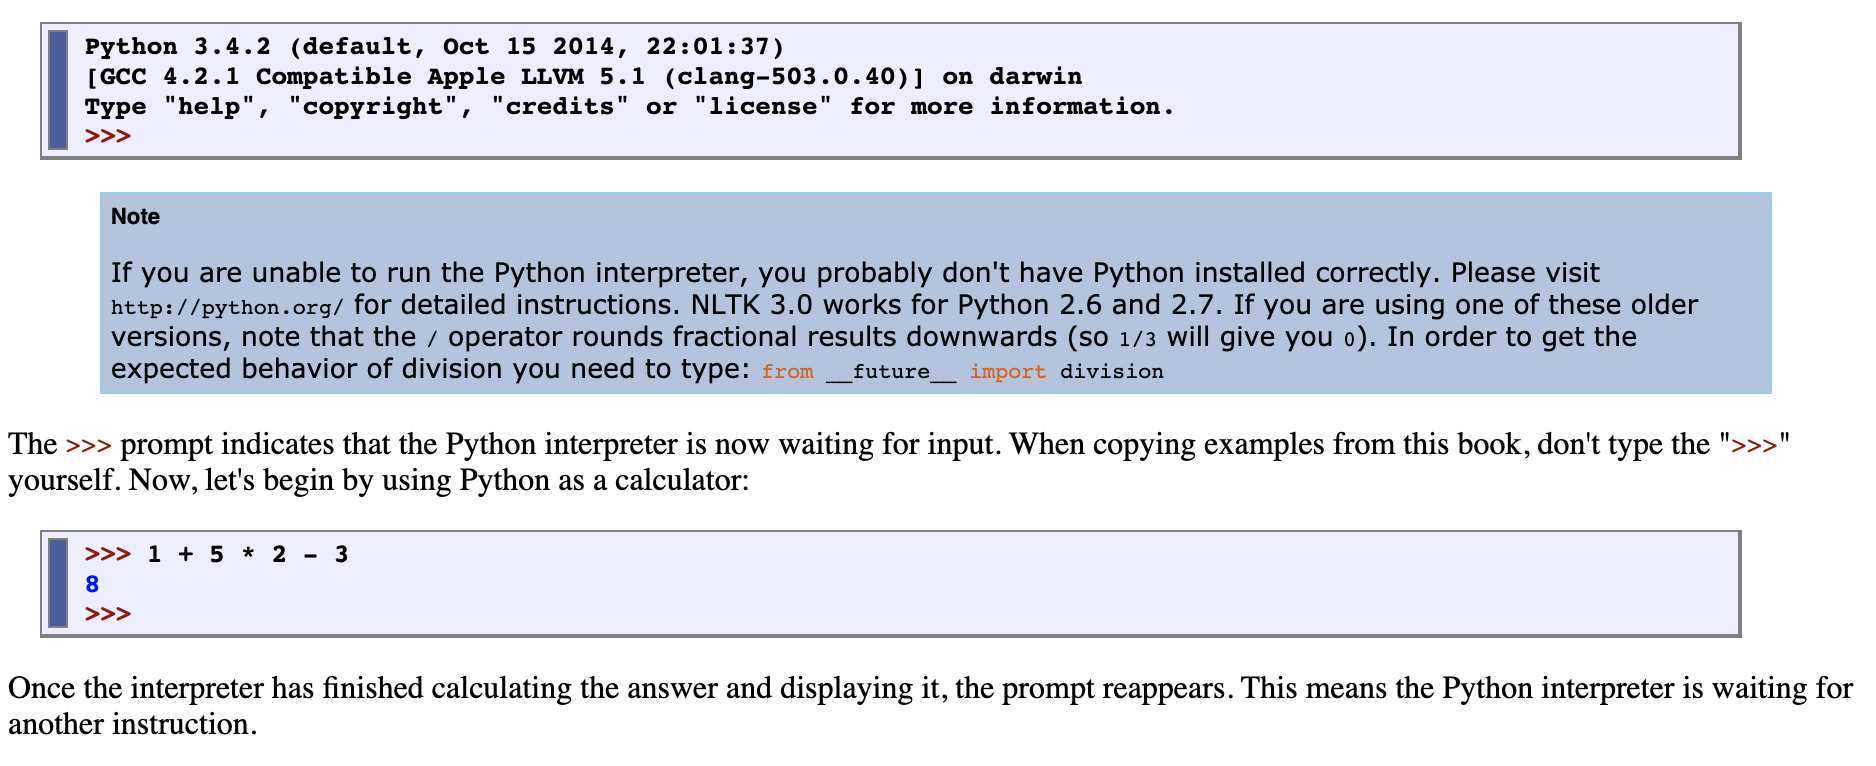

**NOTE**: The Jupyter notebook works differently than the interpreter. Rather than having a ```>>>> ``` you will see: 
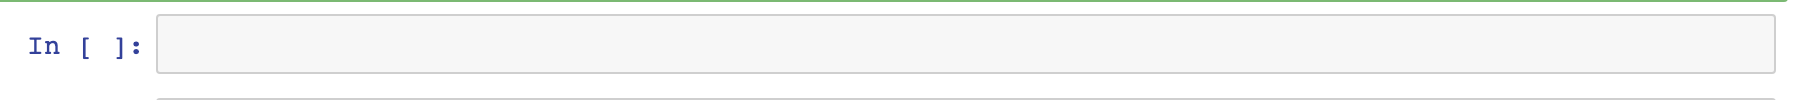

That means you can type the equation directly into the cell. When you press either the "Run" button above or you press the shift+enter keys, you will "execute" the cell, which means that it will run, and your cursor will go to the next cell. 

In the cell below, type the following: 
```python
1 + 5 * 2 - 3 
```

Then press the shift + enter (or return) key. The expected action should be that the answer appears below the cell next to the word ```
OUT []: 
```

The preceding examples demonstrate how you can work interactively with the Python interpreter, experimenting with various expressions in the language to see what they do. Now let's try a nonsensical expression to see how the interpreter handles it: Try typing 1 + (without anything after the plus sign). 

This produced a syntax error. In Python, it doesn't make sense to end an instruction with a plus sign. The Python interpreter indicates the line where the problem occurred (line 1 of <stdin>, which stands for "standard input").

Now that we can use the Python interpreter, we're ready to start working with language data.

### 1.2 Getting Started with NLTK

**NOTE:** At this point in the book, the authors ask you to download and install the text corpora that they'll be using. You completed this activity at the end of the previous notebook, so I am going to skip that portion here. However, if you would like to re-do this part or if the following section does not work for you, you will want to revisit this section of NLP with Python book (https://www.nltk.org/book/ch01.html).

We will pick up at the point in which we import the corpora (different from downloading, importing means that we are making those resources available to Python for use). 

When we get started, we need to let Python know that we are working with certain resources. These resources can be called "libraries" or "packages." We are also able to make particular parts of a package available. We'll do this by saying that from NLTK, we want to import into existing memory all of the texts that are in the "book" portion of NLTK. We do that with the following: 

In [ ]:
import nltk
from nltk.book import *

You have now told Python that you want to have NLTK ready and from NLTK's book corpora, you want to install everything (the * is used as a wild card in many computer programs). So, the correct answer should look like a list of titles. They begin text1:, text2:, etc. In other words, rather than having to type "Moby Dick by Herman Melville 1951" every time you want to use it, NLTK has given it a shortened name: text1. If you give Python this name, it will return to you the title of the text. Try that in the next cell. 

### 1.3   Searching Text
There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word "monstrous" in *Moby Dick* by entering `text1` followed by a period, then the term `concordance`, and then placing `"monstrous"` in parentheses:

In [ ]:
text1.concordance("monstrous")

**Your Turn:** Try searching for other words. If you were using the interpreter rather than this notebook, you could save some re-typing by using up-arrow, Ctrl-up-arrow or Alt-p to access the previous command and modify the word being searched. The notebook doesn't allow this, alas -- but you can modify an existing cell to change the word you're looking for. 

You can also try searches on some of the other texts we have included. For example, search *Sense and Sensibility* for the word affection, using
```  
text2.concordance("affection")
```

Search the book of Genesis to find out how long some people lived, using
``` 
text3.concordance("lived")
```

You could look at text4, the Inaugural Address Corpus, to see examples of English going back to 1789, and search for words like nation, terror, god to see how these words have been used differently over time. We've also included text5, the NPS Chat Corpus: search this for unconventional words like im, ur, lol. (Note that this corpus is uncensored!)

Once you've spent a little while examining these texts, we hope you have a new sense of the richness and diversity of language. In the next chapter you will learn how to access a broader range of text, including text in languages other than English.

A concordance permits us to see words in context. For example, we saw that _monstrous_ occurred in contexts such as *the \___  pictures* and *a \___ size* . What other words appear in a similar range of contexts? We can find out by appending the term `similar` to the name of the text in question, then inserting the relevant word in parentheses:

In [ ]:
text1.similar("monstrous")

In [ ]:
text2.similar("monstrous")

Observe that we get different results for different texts. Austen uses this word quite differently from Melville; for her, _monstrous_ has positive connotations, and sometimes functions as an intensifier like the word _very_.

The term ```common_contexts ``` allows us to examine just the contexts that are shared by two or more words, such as _monstrous_ and _very_. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma:

In [ ]:
text2.common_contexts(["monstrous", "very"])

**Your turn:** pick another pair of words and compare their usage in two different texts, using the ```similar()``` and ```common_contexts()``` functions.

It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a **dispersion plot.** Each stripe represents an instance of a word, and each row represents the entire text. In the results of the cell below (also available at https://www.nltk.org/book/ch01.html#fig-inaugural) we see some striking patterns of word usage over the last 220 years (in an artificial text constructed by joining the texts of the Inaugural Address Corpus end-to-end). You can produce this plot as shown below. You might like to try more words (e.g., _liberty_, _constitution_), and different texts. Can you predict the dispersion of a word before you view it? As before, take care to get the quotes, commas, brackets and parentheses exactly right.

In [ ]:
text4.dispersion_plot(["citizens","democracy", "freedom", "duties", "America"])

**Important Note**: You need to have Python's NumPy and Matplotlib packages installed in order to produce the graphical plots used in this book. If you have already installed Anaconda, these should already be on your computer.

**Note** You can also plot the frequency of word usage through time using https://books.google.com/ngrams. Which is to say that *this* is the function that Google's N-grams viewer is making use of. 

**Also note** There is an exercise in the http://nltk.org book that uses a function to generate random text based on a book from the corpus. This feature no longer works in Python 3.0 or above, but is expected to be added back in eventually. 

### 1.4   Counting Vocabulary
The most obvious fact about texts that emerges from the preceding examples is that they differ in the vocabulary they use. In this section we will see how to use the computer to count the words in a text in a variety of useful ways. As before, you will jump right in and experiment with the Python interpreter, even though you may not have studied Python systematically yet. Test your understanding by modifying the examples, and trying the exercises at the end of the chapter.

Let's begin by finding out the length of a text from start to finish, in terms of the words and punctuation symbols that appear. We use the term len to get the length of something, which we'll apply here to the book of Genesis:

In [ ]:
len(text3)

So Genesis has 44,764 words and punctuation symbols, or "tokens." A **token** is the technical name for a sequence of characters — such as `hairy`, `his`, or `:)` — that we want to treat as a group. When we count the number of tokens in a text, say, the phrase _to be or not to be_, we are counting occurrences of these sequences. Thus, in our example phrase there are two occurrences of _to_, two of _be_, and one each of _or_ and _not_. But there are only four distinct vocabulary items in this phrase. How many distinct words does the book of Genesis contain? To work this out in Python, we have to pose the question slightly differently. The vocabulary of a text is just the set of tokens that it uses, since in a set, all duplicates are collapsed together. In Python we can obtain the vocabulary items of ```text3 ``` with the command: ```set(text3)```. When you do this, many screens of words will fly past. Now try the following:

In [ ]:
sorted(set(text3))

In [ ]:
len(set(text3))

By wrapping sorted( ) around the Python expression ```set(text3)```, we obtain a sorted list of vocabulary items, beginning with various punctuation symbols and continuing with words starting with _A_. All capitalized words precede lowercase words. We discover the size of the vocabulary indirectly, by asking for the number of items in the set, and again we can use ```len``` to obtain this number. Although it has 44,764 tokens, this book has only 2,789 distinct words, or "word types." A **word type** is the form or spelling of the word independently of its specific occurrences in a text — that is, the word considered as a unique item of vocabulary. Our count of 2,789 items will include punctuation symbols, so we will generally call these unique items **types** instead of word types.

Now, let's calculate a measure of the lexical richness of the text. The next example shows us that the number of distinct words is just 6% of the total number of words, or equivalently that each word is used 16 times on average (remember if you're using Python 2, to start with ```from __future__ import division```).

In [ ]:
len(set(text3)) / len(text3)

Next, let's focus on particular words. We can count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word:

In [ ]:
text3.count("smote")

In [ ]:
100 * text4.count('a') / len(text4) 

**Exercise:** How many times does the word _lol_ appear in ```text5```? How much is this as a percentage of the total number of words in this text? [Use the first cell to count the instances of "lol" and the second cell to calculate the percentage of the entire text.]

You may want to repeat such calculations on several texts, but it is tedious to keep retyping the formula. Instead, you can come up with your own name for a task, like "lexical_diversity" or "percentage", and associate it with a block of code. Now you only have to type a short name instead of one or more complete lines of Python code, and you can re-use it as often as you like. The block of code that does a task for us is called a **function**, and we define a short name for our function with the keyword ```def```. The next example shows how to define two new functions, ```lexical_diversity()``` and ```percentage()```:

In [ ]:
def lexical_diversity(text):
    return len(set(text)) / len(text) 

In [ ]:
def percentage(count, total):
    return 100 * count / total

Notice that once you type the first row of the function, the cursor automatically inserts a tab. That's because the Python interpreter in Jupyter Notebook knows to expect an **indented code block**. If you were working in the actual Python interpreter, you would need to remember to insert that tab yourself either with four space bars or the tab key. To finish the indented block, just press enter/return. 

In the definition of ```lexical_diversity()```, we specify a **parameter** named ```text```. This parameter is a "_placeholder_" for the actual text whose lexical diversity we want to compute, and reoccurs in the block of code that will run when the function is used. Similarly, ```percentage()``` is defined to take two parameters, named ```count``` and ```total```.

Once Python knows that lexical_diversity() and percentage() are the names for specific blocks of code, we can go ahead and use these functions:

In [ ]:
lexical_diversity(text3)

In [ ]:
lexical_diversity(text5)

In [ ]:
percentage(4, 5)

In [ ]:
percentage(text4.count('a'), len(text4))

To recap, we use or _call_ a function such as ```lexical_diversity()``` by typing its name, followed by an open parenthesis, the name of the text, and then a close parenthesis. These parentheses will show up often; their role is to separate the name of a task — such as ```lexical_diversity()``` — from the data that the task is to be performed on — such as ```text3```. The data value that we place in the parentheses when we call a function is an **argument** to the function.

You have already encountered several functions in this chapter, such as ```len()```, ```set()```, and ```sorted()```. By convention, we will always add an empty pair of parentheses after a function name, as in ```len()```, just to make clear that what we are talking about is a function rather than some other kind of Python expression. Functions are an important concept in programming, and we only mention them at the outset to give newcomers a sense of the power and creativity of programming. Don't worry if you find it a bit confusing right now.

Later we'll see how to use functions when tabulating data, as in Table 1.1. Each row of the table will involve the same computation but with different data, and we'll do this repetitive work using a function.

![Table 1.1](images/table1-1.png)

## 2   A Closer Look at Python: Texts as Lists of Words
You've seen some important elements of the Python programming language. Let's take a few moments to review them systematically.

### 2.1   Lists
What is a text? At one level, it is a sequence of symbols on a page such as this one. At another level, it is a sequence of chapters, made up of a sequence of sections, where each section is a sequence of paragraphs, and so on. However, for our purposes, we will think of a text as nothing more than a sequence of words and punctuation. Here's how we represent text in Python, in this case the opening sentence of _Moby Dick_:

In [ ]:
sent1 = ['Call', 'me', 'Ishmael', '.']

In [ ]:
sent1

In [ ]:
len(sent1)

In [ ]:
lexical_diversity(sent1)

Some more lists have been defined for you, one for the opening sentence of each of our texts, ```sent2 … sent9```. We inspect two of them here; you can see the rest for yourself using the Python interpreter (if you get an error which says that ```sent2``` is not defined, you need to first type ```from nltk.book import *```).

In [ ]:
from nltk.book import *

In [ ]:
sent2

In [ ]:
sent3

**Your Turn:** Make up a few sentences of your own, by typing a name, equals sign, and a list of words, like this: ```ex1 = ['Monty', 'Python', 'and', 'the', 'Holy', 'Grail']```. Repeat some of the other Python operations we saw earlier in 1, e.g., ```sorted(ex1), len(set(ex1)), ex1.count('the')```.



A pleasant surprise is that we can use Python's addition operator on lists. Adding two lists creates a new list with everything from the first list, followed by everything from the second list:


In [ ]:
['Monty', 'Python'] + ['and', 'the', 'Holy', 'Grail']

This special use of the addition operation is called **concatenation**; it combines the lists together into a single list. We can concatenate sentences to build up a text.

We don't have to literally type the lists either; we can use short names that refer to pre-definied lists. 

In [ ]:
sent4 + sent1

What if we want to add a single item to a list? This is known as **appending**. When we ```append()``` to a list, the list itself is updated as a result of the operation. 

In [ ]:
sent1.append("Some")
sent1

### 2.2   Indexing Lists
As we have seen, a text in Python is a list of words, represented using a combination of brackets and quotes. Just as with an ordinary page of text, we can count up the total number of words in ```text1``` with ```len(text1)```, and count the occurrences in a text of a particular word — say, ```'heaven'``` — using ```text1.count('heaven')```.

With some patience, we can pick out the 1st, 173rd, or even 14,278th word in a printed text. Analogously, we can identify the elements of a Python list by their order of occurrence in the list. The number that represents this position is the item's index. We instruct Python to show us the item that occurs at an index such as 173 in a text by writing the name of the text followed by the index inside square brackets:

In [ ]:
text4[173]

We can do the converse;given a word, find the index of when it *first* occurs: 

In [ ]:
text4.index('awaken')

Indexes are a common way to access the words of a text, or, more generally, the elements of any list. Python permits us to access sublists as well, extracting manageable pieces of language from large texts, a technique known as **slicing**.

In [ ]:
text5[16715:16735]

In [ ]:
text6[1600:1625]

Indexes have some subtleties, and we'll explore these with the help of an artificial sentence:

In [ ]:
sent = ['word1', 'word2', 'word3', 'word4', 'word5', 
        'word6', 'word7', 'word8', 'word9', 'word10']

In [ ]:
sent[0]

In [ ]:
sent[9]

Notice that our indexes start from zero: sent element zero, written ```sent[0]```, is the first word, ```'word1'```, whereas sent element 9 is ```'word10'```. The reason is simple: the moment Python accesses the content of a list from the computer's memory, it is already at the first element; we have to tell it how many elements forward to go. Thus, zero steps forward leaves it at the first element.

**Note** This practice of counting from zero is initially confusing, but typical of modern programming languages. You'll quickly get the hang of it if you've mastered the system of counting centuries where 19XY is a year in the 20th century, or if you live in a country where the floors of a building are numbered from 1, and so walking up _n-1_ flights of stairs takes you to level _n_.

Now, if we accidentally use an index that is too large, we get an error:

In [ ]:
sent[10]

This time it is not a syntax error, because the program fragment is syntactically correct. Instead, it is a **runtime error**, and it produces a ```Traceback``` message that shows the context of the error, followed by the name of the error, ```IndexError```, and a brief explanation.

Let's take a closer look at slicing, using our artificial sentence again. Here we verify that the slice ```5:8``` includes sent elements at indexes 5, 6, and 7:

In [ ]:
sent[5:8]

In [ ]:
sent[5]

In [ ]:
sent[6]

In [ ]:
sent[7]

By convention, ```m:n``` means elements ```m…n-1```. As the next example shows, we can omit the first number if the slice begins at the start of the list, and we can omit the second number if the slice goes to the end:

In [ ]:
sent[:3]

In [ ]:
text2[141525:]

We can modify an element of a list by assigning to one of its index values. In the next example, we put sent[0] on the left of the equals sign. We can also replace an entire slice with new material. A consequence of this last change is that the list only has four elements, and accessing a later value generates an error.

In [ ]:
sent[0] = 'First'
sent[9] = 'Last'
len(sent)

In [ ]:
sent[1:9] = ['Second', 'Third']
sent

In [ ]:
sent[9]

**Your Turn:** Take a few minutes to define a sentence of your own and modify individual words and groups of words (slices) using the same methods used earlier. Check your understanding by trying the exercises on lists at the end of this chapter. (You can add cells for practice if you would like.)

### 2.3   Variables

From the start of 1, you have had access to texts called ```text1, text2,``` and so on. It saved a lot of typing to be able to refer to a 250,000-word book with a short name like this! In general, we can make up names for anything we care to calculate. We did this ourselves in the previous sections, e.g., defining a **variable** ```sent1```, as follows:

In [ ]:
sent1 = ['Call', 'me', 'Ishmael', '.']
sent1

Such lines have the form: *variable = expression*. Python will evaluate the expression, and save its result to the variable. This process is called **assignment**. It does not generate any output; you have to type the variable on a line of its own to inspect its contents. The equals sign is slightly misleading, since information is moving from the right side to the left. It might help to think of it as a left-arrow. The name of the variable can be anything you like, e.g., ```my_sent, sentence, xyzzy```. It must start with a letter, and can include numbers and underscores. Here are some examples of variables and assignments:

In [ ]:
my_sent = ['Bravely', 'bold', 'Sir', 'Robin', ',', 'rode',
           'forth', 'from', 'Camelot', '.']
my_sent

In [ ]:
noun_phrase = my_sent[1:4]
noun_phrase

In [ ]:
wOrDs = sorted(noun_phrase)
wOrDs

Remember that capitalized words appear before lowercase words in sorted lists.

**Note**: Notice in the previous example that we split the definition of my_sent over two lines. Python expressions can be split across multiple lines, so long as this happens within any kind of brackets. The Python interpreter uses a "..." prompt to indicate that more input is expected. It doesn't matter how much indentation is used in these continuation lines, but some indentation usually makes them easier to read.

It is good to choose meaningful variable names to remind you — and to help anyone else who reads your Python code — what your code is meant to do. Python does not try to make sense of the names; it blindly follows your instructions, and does not object if you do something confusing, such as ```one = 'two'``` or ```two = 3```. The only restriction is that a variable name cannot be any of Python's reserved words, such as ```def, if, not, and import```. If you use a reserved word, Python will produce a syntax error:

In [ ]:
not = 'Camelot'

We will often use variables to hold intermediate steps of a computation, especially when this makes the code easier to follow. Thus ```len(set(text1))``` could also be written:

In [ ]:
vocab = set(text1)
vocab_size = len(vocab)
vocab_size

**Caution!**

Take care with your choice of names (or **identifiers**) for Python variables. First, you should start the name with a letter, optionally followed by digits (0 to 9) or letters. Thus, ```abc23``` is fine, but ```23abc``` will cause a syntax error. Names are case-sensitive, which means that ```myVar``` and ```myvar``` are distinct variables. Variable names cannot contain whitespace, but you can separate words using an underscore, e.g., ```my_var```. Be careful not to insert a hyphen instead of an underscore: ```my-var``` is wrong, since Python interprets the "-" as a minus sign.

### 2.4   Strings
Some of the methods we used to access the elements of a list also work with individual words, or strings. For example, we can assign a string to a variable (```name = 'Monty'```), index a string (treat each letter of the word "Monty" as an index of 5 letters: M, o, n, t, y), and slice a string (select only a few letters from the index of letters that make up the word "Monty"):

In [ ]:
name = 'Monty'
name[0]

In [ ]:
name[:4]

We can also perform multiplication and addition with strings: 

In [ ]:
name * 2

In [ ]:
name + '1'

We can join the words of a list to make a single string, or split a string into a list, as follows: 

In [ ]:
' '.join(['Monty', 'Python'])

In [ ]:
'Monty Python'.split()

We sill come back to the topic of strings in Chapter 3. For the time being, we have two important building blocks -- lists and strings -- and are ready to get back to some language analysis. 

## 3   Computing with Language: Simple Statistics
Let's return to our exploration of the ways we can bring our computational resources to bear on large quantities of text. We began this discussion in [1](https://www.nltk.org/book/ch01.html#sec-computing-with-language-texts-and-words), and saw how to search for words in context, how to compile the vocabulary of a text, how to generate random text in the same style, and so on.

In this section we pick up the question of what makes a text distinct, and use automatic methods to find characteristic words and expressions of a text. As in [1](https://www.nltk.org/book/ch01.html#sec-computing-with-language-texts-and-words), you can try new features of the Python language by copying them into the interpreter, and you'll learn about these features systematically in the following section.

Before continuing further, you might like to check your understanding of the last section by predicting the output of the following code. You can use the interpreter to check whether you got it right. If you're not sure how to do this task, it would be a good idea to review the previous section before continuing further.



In [ ]:
saying = ['After', 'all', 'is', 'said', 'and', 'done',
          'more', 'is', 'said', 'than', 'done']
tokens = set(saying)
tokens = sorted(tokens)
tokens[-2:]

### 3.1   Frequency Distributions
How can we automatically identify the words of a text that are most informative about the topic and genre of the text? Imagine how you might go about finding the 50 most frequent words of a book. One method would be to keep a tally for each vocabulary item, like that shown in [3.1](https://www.nltk.org/book/ch01.html#fig-tally). The tally would need thousands of rows, and it would be an exceedingly laborious process — so laborious that we would rather assign the task to a machine.

![figure3-1.png](images/figure3-1.png)

The table in [3.1](https://www.nltk.org/book/ch01.html#fig-tally) is known as a **frequency distribution**, and it tells us the frequency of each vocabulary item in the text. (In general, it could count any kind of observable event.) It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a ```FreqDist``` to find the 50 most frequent words of *Moby Dick*:


In [ ]:
fdist1 = FreqDist(text1)
print(fdist1)

In [ ]:
fdist1.most_common(50)

In [ ]:
fdist1['whale']

When we first invoke FreqDist, we pass the name of the text as an argument. We can inspect the total number of words ("outcomes") that have been counted up — 260,819 in the case of *Moby Dick*. The expression ```most_common(50)``` gives us a list of the 50 most frequently occurring types in the text.

**Your Turn:** Try the preceding frequency distribution example for yourself, for ```text2```. Be careful to use the correct parentheses and uppercase letters. If you get an error message NameError: name 'FreqDist' is not defined, you need to start your work with ```from nltk.book import * ```

In [ ]:
fdist2 = FreqDist(text2)
print(fdist2)
fdist2.most_common(50)

Do any words produced in the last example help us grasp the topic or genre of this text? Only one word, *whale*, is slightly informative! It occurs over 900 times. The rest of the words tell us nothing about the text; they're just English "plumbing." What proportion of the text is taken up with such words? We can generate a cumulative frequency plot for these words, using ```fdist1.plot(50, cumulative=True)```, to produce the graph below. These 50 words account for nearly half the book!

![figure3-2.png](images/figure3-2.png)

If the frequent words don't help us, how about the words that occur once only, the so-called **hapaxes**? View them by typing ```fdist1.hapaxes()```. This list contains _lexicographer, cetological, contraband, expostulations_, and about 9,000 others. It seems that there are too many rare words, and without seeing the context we probably can't guess what half of the hapaxes mean in any case! Since neither frequent nor infrequent words help, we need to try something else.


In [ ]:
fdist1.hapaxes()

## 3.2   Fine-grained Selection of Words
Next, let's look at the _long_ words of a text; perhaps these will be more characteristic and informative. For this we adapt some notation from set theory. We would like to find the words from the vocabulary of the text that are more than 15 characters long. Let's call this property _P_, so that _P(w)_ is true if and only if w is more than 15 characters long. Now we can express the words of interest using mathematical set notation as shown in (1a). This means "the set of all _w_ such that _w_ is an element of _V_ (the vocabulary) and _w_ has property _P_".

![set-notation.png](images/set-notation.png)

The corresponding Python expression is given in (1b). (Note that it produces a list, not a set, which means that duplicates are possible.) Observe how similar the two notations are. Let's go one more step and write executable Python code:

In [ ]:
V = set(text9)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

For each word ```w``` in the vocabulary ```V```, we check whether ```len(w)``` is greater than 15; all other words will be ignored. We will discuss this syntax more carefully later. 

**Your Turn**: Try out the previous statements in a cell of your own, and experiment with changing the text and changing the length condition. Does it make a difference to your results if you change the variable names, e.g., using ```[word for word in vocab if ...]```?

Let's return to our task of finding words that characterize a text. Notice that the long words in text4 reflect its national focus — _constitutionally, transcontinental_ — whereas those in text5 reflect its informal content: _boooooooooooglyyyyyy and yuuuuuuuuuuuummmmmmmmmmmm_. Have we succeeded in automatically extracting words that typify a text? Well, these very long words are often hapaxes (i.e., unique) and perhaps it would be better to find _frequently occurring long words_. This seems promising since it eliminates frequent short words (e.g., _the_) and infrequent long words (e.g. _antiphilosophists_). Here are all words from the chat corpus that are longer than seven characters, that occur more than seven times:

In [ ]:
fdist5 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

Notice how we have used two conditions: ```len(w) > 7 ``` ensures that the words are longer than seven letters and ```fdist5[w] > 7 ```ensures that these words occur more than seven times. At last we have managed to automatically identify the frequently-occurring content-bearing words of the text. It is a modest but important miestone: a tiny piece of code, processing tens of thousands of words, produces some informative output. 

### 3.3   Collocations and Bigrams
A **collocation** is a sequence of words that occur together unusually often. Thus *red wine* is a collocation, whereas *the wine* is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, *maroon wine* sounds definitely odd.

To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as *bigrams*. This is easily accomplished with the function ```nltk.bigrams()```: 

(**NOTE:** This is a fix that is not reflected in the book. Bigrams are being handled differently in NLTK. The other way to do this is to add one line that reads: ```from nltk.util import bigrams ```)

In [ ]:
list(nltk.bigrams(['more', 'is', 'said', 'than', 'done']))

Here we see that the pair of words _than-done_ is a bigram, and we write it in Python as ```('than', 'done')```. Now, collocations are essentially just frequent bigrams, except that we want to pay more attention to the cases that involve rare words. In particular, we want to find bigrams that occur more often than we would expect based on the frequency of the individual words. The ```collocations()``` function does this for us. We will see how it works later.

In [ ]:
text4.collocations()

In [ ]:
text8.collocations()

Th collocations that emerge are very specific to the genre of the texts. In order to find *red wine* as a collocation, we  would need to process a much larger body of text.

### 3.4   Counting Other Things
Counting words is useful, but we can count other things too. For example, we can look at the distribution of word lengths in a text, by creating a ```FreqDist``` out of a long list of numbers, where each number is the length of the corresponding word in the text:

In [ ]:
[len(w) for w in text1]

In [ ]:
fdist = FreqDist(len(w) for w in text1)
print(fdist)

In [ ]:
fdist

We start by deriving a list of the lengths of words in text1, and the FreqDist then counts the number of times each of these occurs. The result is a distribution containing a quarter of a million items, each of which is a number corresponding to a word token in the text. But there are at most only 20 distinct items being counted, the numbers 1 through 20, because there are only 20 different word lengths. I.e., there are words consisting of just one character, two characters, ..., twenty characters, but none with twenty one or more characters. One might wonder how frequent the different lengths of word are (e.g., how many words of length four appear in the text, are there more words of length five than length four, etc). We can do this as follows:

In [ ]:
fdist.most_common()

In [ ]:
fdist.max()

In [ ]:
fdist[3]

In [ ]:
fdist.freq(3)

From this we see that the most frequent word length is 3, and that words of length 3 account for roughly 50,000 (or 20%) of the words making up the book. Although we will not pursue it here, further analysis of word length might help us understand differences between authors, genres, or languages.

![table3-1.png](images/table3-1.png)

Our discussion of frequency distributions has introduced some important Python concepts, and we will look at them systematically in 4. 